In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Any

In [2]:
# параметры системы

L = 3.0  # половины длины стежня
left, right = -L, L  # левая и правая граница стержня
left_value, right_value = 1.0, 0.0  # значения u(left, 0) и u(right, 0)


# функиця H системы
def H(x):
    H = np.empty(len(x), dtype=float)
    for i in range(len(x)):
        H[i] = 1.0 if x[i] > 0 else 0.0
    return H


# функция, которая применяет к решению граничные условия
def apply_boundary_conditions(u, n):
    u[n, 0] = left_value
    u[n, -1] = right_value


# функция, которая применяет к решению начальные условия
def apply_start_conditions(u, x):
    u[0, :] = np.ones(u.shape[1]) - H(x)

In [3]:
def get_solution(
        eps: float,
        a: float,
        left: float,
        right: float,
        T: float,
        h: float,
        tau: float,
        apply_boundary_conditions: Callable[[Any, int], None],
        apply_start_conditions: Callable[[Any, Any], None],
):
    x = np.arange(left, right + h, h)  # cетка по пространству
    t = np.arange(0, T + tau, tau)  # cетка по времение
    u = np.zeros((len(t), len(x)))  # пустое решение

    apply_boundary_conditions(u, 0)  # применяем граничные условия
    apply_start_conditions(u, x)  # применяем начальные условия

    for n in range(0, len(t) - 1):
        apply_boundary_conditions(u, n + 1)
        for i in range(1, len(x) - 1):
            # используем явную формулу, которые вывели до этого
            u[n + 1, i] = u[n, i] + tau * (
                    eps * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2) -
                    a * ((u[n, i + 1] - u[n, i - 1]) / (2 * h))
            )

    return u, x

In [15]:
# задаем параметры системы
eps = 0.1
a = 0.1
T = 20
h = 0.05
tau = 0.001

In [16]:
# решаем систему
u, x = get_solution(
    eps=eps,
    a=a,
    left=left,
    right=right,
    T=T,
    h=h,
    tau=tau,
    apply_boundary_conditions=apply_boundary_conditions,
    apply_start_conditions=apply_start_conditions
)

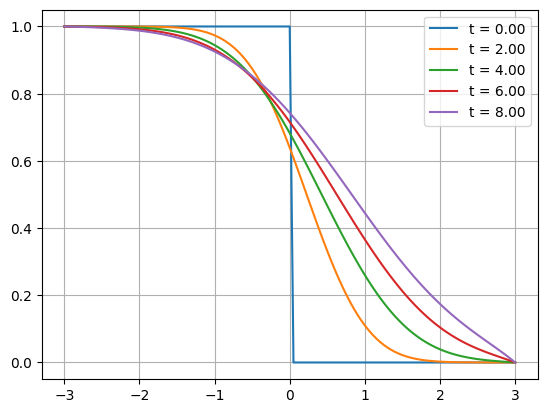

In [17]:
# построение графика для первых нескольких шагов

step_count = 10
times_to_plot = np.arange(0, T, T / step_count)
for t in times_to_plot[:5]:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# cоздание гифки
image_folder = 'for_gif'
gif_path = 'animation.gif'

In [19]:
def create_images_for_gif(image_folder: str):
    # создать графики в папке for_gif
    for t in np.arange(0, 12, 10 * tau):
        n = int(t / tau)
        plt.plot(x, u[n, :])
        plt.title(f'{eps = }, {a = }, t = {t:.6f}, {h = }, {tau = }')
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('u(x)')
        # plt.ylim(-1, 3)
        plt.ylim(-0.1, 1.5)
        plt.savefig(f'{image_folder}/{t:012.6f}.png')
        plt.close()

In [20]:
from convection_diffusion_equation.gif import create_gif

create_gif(image_folder, gif_path, create_images_for_gif, step=20, skip_creating=False)

Очищаю папку...
Создаю изображния...
Создаю gif...
Gif cоздано
